In [41]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from ipywidgets import widgets

In [42]:
# load the data
dataset = gpd.read_file('./data.gpkg')
print('dataset size: ', dataset.shape[0])
print('dataset columns: ', dataset.columns.values)

dataset size:  1456
dataset columns:  ['TxID' 'StrNr' 'Strak' 'BdlNr' 'Bandel' 'Forbind_1' 'PlSignFr' 'PlNamnFr'
 'PlSignTi' 'PlNamnTi' 'AntalSpar' 'Elektrif' 'Infraforv' 'UHDist' 'TrSys'
 'TComr' 'Status' 'BdlSeq' 'geometry']


In [43]:
# load the dataset containg the information if a passenger can board a train
stations = gpd.read_file('./stations.gpkg')
stations = stations[stations.PlTyp != 'dp*']

print('dataset size: ', stations.shape[0])
print('dataset columns: ', stations.columns.values)
# the column ResUtbyte is the one we are interested in below:

dataset size:  1611
dataset columns:  ['OBJECTID' 'TplKod' 'Sign' 'SignTxt' 'PlNamn' 'PlTyp' 'PltypBesk'
 'Tillh_dpd' 'Tillh_dp_lp' 'PlStatus' 'ResUtbyte' 'Lastpl' 'Hamn'
 'Kombiterm' 'Northing' 'Easting' 'Latitud' 'Longitud' 'Moh' 'Strak'
 'Bandel' 'Kmtalfr' 'Kmtalti' 'Region' 'TL' 'UH' 'Dignitet' 'Skapad'
 'geometry']


In [44]:
# load map of sweden (used for plotting)
sweden = gpd.read_file('./swedish_municipalities.geojson')
sweden = sweden.to_crs('EPSG:3006')

In [45]:
filtered_dataset = dataset.copy()

In [46]:
remove_list = stations[stations.ResUtbyte != 'j'].SignTxt.values
for to_remove in filtered_dataset[(filtered_dataset.PlSignFr.isin(remove_list))].PlSignFr.unique():

    station = stations[stations.SignTxt == to_remove] 

    matched = stations[stations.Tillh_dp_lp == station.PlNamn.values[0]]
    if matched.shape[0] != 0:
        if matched.ResUtbyte.values[0] == 'j':
            continue                   
        
    # find rows with station that should be removed
    pre_row = filtered_dataset[(filtered_dataset.PlSignTi == to_remove)]
    suc_row = filtered_dataset[(filtered_dataset.PlSignFr == to_remove)]

    filtered_dataset.loc[pre_row.index,'PlSignTi'] = suc_row.PlSignTi.values[0]
    filtered_dataset.loc[pre_row.index,'PlNamnTi'] = suc_row.PlNamnTi.values[0]

    filtered_dataset.drop(suc_row.index, inplace=True, axis=0)
filtered_dataset

,TxID,StrNr,Strak,BdlNr,Bandel,Forbind_1,PlSignFr,PlNamnFr,PlSignTi,PlNamnTi,AntalSpar,Elektrif,Infraforv,UHDist,TrSys,TComr,Status,BdlSeq,geometry
2,T230282,8.0,Norra stambanan,217.0,Bollnäs-Ljusdal,Ab-Vl,Ab,Arbrå,Vl,Vallsta,1.0,Ja,Trafikverket infrastruktur,Mitt,sysH,Gä,Öppen,217104.0,"LINESTRING (573518.164 6816036.145, 573517.398..."
8,T230195,99.0,Inlandsbanan,161.0,(Gällivare)-(Arvidsjaur),Ajr-Nkr,Ajr,Arvidsjaur,Nkr,Norra Kikkejaur,1.0,Nej,Inlandsbanan AB,IBAB,sysM,Gä,Öppen,161101.0,"LINESTRING (692144.289 7280445.156, 692142.397..."
9,T230031,21.0,Malmbanan,111.0,(Peuravaara)-Riksgränsen-(Björnfjell),Ak-Bln,Ak,Abisko östra,Bln,Björkliden,1.0,Ja,Trafikverket infrastruktur,Nord,sysH,Bdn,Öppen,111110.0,"LINESTRING (657624.433 7586639.317, 657620.394..."
11,T231056,74.0,(Alvhem) - Lilla Edet,666.0,(Alvhem)-Lilla Edet,Alh-Löö,Alh,Alvhem,Let,Lilla Edet,1.0,Nej,Trafikverket infrastruktur,Väst,sysS,G,Öppen,666101.0,"LINESTRING (332165.875 6433556.851, 331653.000..."
12,T230989,11.0,Norge-/Vänerbanan med Nordlänken,635.0,Öxnered-(Älvängen),Alh-Än,Alh,Alvhem,Än,Älvängen,2.0,Ja,Trafikverket infrastruktur,Väst,sysH,G,Öppen,635106.0,"LINESTRING (332165.875 6433556.851, 332165.685..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,T231204,24.0,Malmö närområde,901.0,Burlöv-Malmö C.Arlöv-Lockarp,Övn-Fsb,Övn,Östervärn,Sea,Svedala,2.0,Ja,Trafikverket infrastruktur,Syd,sysH,M,Öppen,901105.0,"LINESTRING (376125.298 6164076.776, 376258.000..."
1450,T231312,94.0,(Östervärn) - Brågarp,964.0,(Östervärn)-Brågarp,Övn-Sege,Övn,Östervärn,Båp,Brågarp,1.0,Nej,Trafikverket infrastruktur,Syd,None,M,Ejunderh,964101.0,"LINESTRING (376125.298 6164076.776, 376125.412..."
1452,T230984,11.0,Norge-/Vänerbanan med Nordlänken,635.0,Öxnered-(Älvängen),Öx-Thn,Öx,Öxnered,Thn,Trollhättan,2.0,Ja,Trafikverket infrastruktur,Väst,sysH,G,Öppen,635101.0,"LINESTRING (340504.707 6471923.075, 340458.000..."
1453,T231025,15.0,Älvsborgsbanan,652.0,(Öxnered)-(Håkantorp),Öx-Vg,Öx,Öxnered,Vg,Vänersborg central,1.0,Ja,Trafikverket infrastruktur,Väst,sysH,G,Öppen,652101.0,"LINESTRING (340504.707 6471923.075, 340597.519..."


In [47]:
df = filtered_dataset[['PlSignFr', 'PlSignTi']]
df

,PlSignFr,PlSignTi
2,Ab,Vl
8,Ajr,Nkr
9,Ak,Bln
11,Alh,Let
12,Alh,Än
...,...,...
1449,Övn,Sea
1450,Övn,Båp
1452,Öx,Thn
1453,Öx,Vg


In [48]:
df = pd.concat([df, pd.DataFrame(data=df[['PlSignTi', 'PlSignFr']].values, columns=['PlSignFr', 'PlSignTi'])])
df

,PlSignFr,PlSignTi
2,Ab,Vl
8,Ajr,Nkr
9,Ak,Bln
11,Alh,Let
12,Alh,Än
...,...,...
770,Sea,Övn
771,Båp,Övn
772,Thn,Öx
773,Vg,Öx


In [49]:
adj_matrix = pd.crosstab(df.PlSignFr, df.PlSignTi)
adj_matrix

PlSignTi,Ab,Aik,Ajr,Ak,Alh,Ar,Arb,Arnc,Arnn,Arns,...,Ökn,Önd,Ör,Örs,Ös,Öso,Öte,Övm,Övn,Öx
PlSignFr,,,,,,,,,,,,,,,,,,,,,
Ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ajr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ak,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Öso,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Öte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Övm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
adj_matrix_numpy = adj_matrix.to_numpy()


In [51]:
from_w = widgets.Combobox(
    placeholder='Choose ',
    options=stations.PlNamn.to_list(),
    description='Fran',
    ensure_option=True,
    disabled=False
)

to_w = widgets.Combobox(
    placeholder='Choose ',
    options=stations.PlNamn.to_list(),
    description='Till',
    ensure_option=True,
    disabled=False
)

display(from_w)
display(to_w)


Combobox(value='', description='Fran', ensure_option=True, options=('Vinnö', 'Triabo', 'Totebo', 'Lundsbrunn',…

Combobox(value='', description='Till', ensure_option=True, options=('Vinnö', 'Triabo', 'Totebo', 'Lundsbrunn',…

In [17]:
from_station = stations[stations.PlNamn == from_w.value].Sign.values[0]
to_station = stations[stations.PlNamn == to_w.value].Sign.values[0]

cols = adj_matrix.columns.to_list()

from_index = cols.index(from_station)
to_index = cols.index(to_station)

ajdc = adj_matrix_numpy.copy()
n = 1

non_zero = np.argwhere(ajdc[from_index, :] != 0)


searched = [[]] 

for i in non_zero:
    searched[0].append(cols[i[0]])

while ajdc[from_index, to_index] == 0: 
  
    n+=1
    
    ajdc = np.linalg.matrix_power(adj_matrix_numpy, n)
    non_zero = np.argwhere(ajdc[from_index, :] != 0)
    searched.append([])
    for i in non_zero:
        searched[n-1].append(cols[i[0]])
    
non_zero = np.argwhere(ajdc[from_index, :] != 0)

for i in non_zero:
        searched[n-1].append(cols[i[0]])


print(n)

Cst Ab
Cst Alh
Cst Ar
Cst Arb
Cst Arnc
Cst Av
Cst Avky
Cst Bef
Cst Bf
Cst Bfo
Cst Bg
Cst Bhb
Cst Bhs
Cst Bib
Cst Bih
Cst Bjm
Cst Bjuv
Cst Bkb
Cst Blgc
Cst Bma
Cst Bml
Cst Bn
Cst Boa
Cst Bor
Cst Boy
Cst Brh
Cst Bro
Cst Bry
Cst Bsc
Cst Bst
Cst Bsä
Cst Bx
Cst Bä
Cst Bäb
Cst Bål
Cst Cg
Cst Ck
Cst Cr
Cst Cst
Cst Dg
Cst Dl
Cst Dld
Cst Dt
Cst E
Cst Ei
Cst Ek
Cst Em
Cst En
Cst Ep
Cst Esn
Cst Et
Cst Fabg
Cst Fabp
Cst Fal
Cst Fas
Cst Fby
Cst Fd
Cst Feb
Cst Feö
Cst Fg
Cst Fgc
Cst Fgå
Cst Fhm
Cst Fid
Cst Fki
Cst Fkr
Cst Flb
Cst Fle
Cst Fln
Cst Fm
Cst Fod
Cst Fra
Cst Fs
Cst Ft
Cst Fv
Cst Fär
Cst G
Cst Gal
Cst Gau
Cst Gdö
Cst Gg
Cst Gm
Cst Gms
Cst Gn
Cst Gnf
Cst Gng
Cst Gnp
Cst Gnö
Cst Gop
Cst Gsh
Cst Gyo
Cst Gä
Cst Gö
Cst Hak
Cst Hbd
Cst Hd
Cst Hdm
Cst Hdn
Cst Hel
Cst Hes
Cst Het
Cst Hf
Cst Hfa
Cst Hfr
Cst Hgl
Cst Hgv
Cst Hh
Cst Hka
Cst Hkl
Cst Hlf
Cst Hls
Cst Hm
Cst Hmö
Cst Hnd
Cst Hnä
Cst Ho
Cst Hod
Cst Hova
Cst Hpbg
Cst Hr
Cst Hre
Cst Hsd
Cst Hsr
Cst Hto
Cst Hu
Cst Hul
Cst Hv
Cst Hvd
Cst Hvp
Cst

MovieWriter ffmpeg unavailable; using Pillow instead.


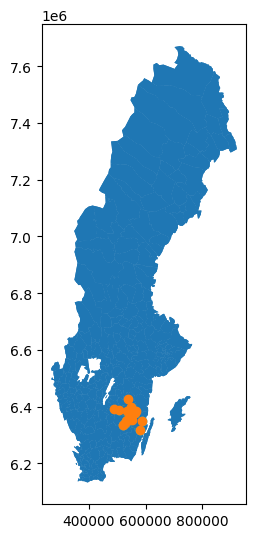

In [ ]:
fig, ax = plt.subplots()

fig.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)

def init():
    sweden.geometry.plot(ax=ax, zorder=1)

def animate(i):
    k = stations[stations.Sign.isin(searched[i])]
    k.geometry.plot(ax=ax, zorder=2)

anim = FuncAnimation(fig, animate, init_func=init,interval=200,repeat_delay=300, frames=len(searched))
anim.save(f'{from_station}-{to_station}.gif')

In [ ]:
n = 1
result = np.linalg.matrix_power(adj_matrix_numpy , n)
print("grannmatrisen upphöjt till", n, "är:")
print(result)

# Räkna antalet icke-noll element i varje rad
non_zero_counts = np.count_nonzero(result, axis=1)

# Hämta indexen för de 10 raderna med flest icke-noll element
top_10_indices = np.argsort(non_zero_counts)[::-1][:10]

print("Top 10 rader med flest icke-noll element är:")
for index in top_10_indices:
    print("Rad", adj_matrix.columns[index])
    print("Antal icke-noll element:", non_zero_counts[index])

grannmatrisen upphöjt till 1 är:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Top 10 rader med flest icke-noll element är:
Rad N
Antal icke-noll element: 6
Rad V
Antal icke-noll element: 5
Rad Hm
Antal icke-noll element: 5
Rad Åp
Antal icke-noll element: 5
Rad Kbä
Antal icke-noll element: 4
Rad Blgc
Antal icke-noll element: 4
Rad Msl
Antal icke-noll element: 4
Rad Bsc
Antal icke-noll element: 4
Rad Kil
Antal icke-noll element: 4
Rad Kg
Antal icke-noll element: 4


In [ ]:
adj_matrix_numpy = adj_matrix.to_numpy()

# Upphöj till en given potens (här: n = 1)
n = 1
result = np.linalg.matrix_power(adj_matrix_numpy, n)

# Räkna antalet icke-noll element i varje rad
non_zero_counts = np.count_nonzero(result, axis=1)

# Hämta indexen för raderna med flest icke-noll element (ändra 10 till önskat antal stationer)
top_indices = np.argsort(non_zero_counts)[::-1][:10]

# Visa de stationer med flest anslutningar
print("Stationer med flest anslutningar:")
for index in top_indices:
    station = adj_matrix.index[index]  
    filtered_station = stations[stations.Sign == station]  # Filtrerar baserat på 'Sign' kolumnen
    count = non_zero_counts[index]
    print(f"Station: {station}, Antal anslutningar: {count}")
    
    # Hämtar kolumnen 'PlNamn' för varje filtrerad station och skriver ut den
    if not filtered_station.empty:
        pinamn_values = filtered_station['PlNamn'].values.tolist()
        print(f"PINamn för station {station}: {pinamn_values}")
    else:
        print(f"Ingen information hittades för station {station}")



Stationer med flest anslutningar:
Station: N, Antal anslutningar: 6
PINamn för station N: ['Nässjö central']
Station: V, Antal anslutningar: 5
PINamn för station V: ['Värnamo']
Station: Hm, Antal anslutningar: 5
PINamn för station Hm: ['Hässleholm']
Station: Åp, Antal anslutningar: 5
PINamn för station Åp: ['Åstorp']
Station: Kbä, Antal anslutningar: 4
PINamn för station Kbä: ['Kolbäck']
Station: Blgc, Antal anslutningar: 4
PINamn för station Blgc: ['Borlänge central']
Station: Msl, Antal anslutningar: 4
PINamn för station Msl: ['Mellansel']
Station: Bsc, Antal anslutningar: 4
PINamn för station Bsc: ['Borås central']
Station: Kil, Antal anslutningar: 4
PINamn för station Kil: ['Kil']
Station: Kg, Antal anslutningar: 4
PINamn för station Kg: ['Kävlinge']
